In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from seaborn import axes_style
%matplotlib inline
df1 = pd.read_csv(r"C:\Users\arock\Desktop\Python Assignment\Uber Assignment\Uber Request Data.csv")

In [13]:
#Getting the information on the data for the purpose of cleaning up
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [14]:
#Finding out the demand of cars based on the trip completion to requests made data
cars_on_demand = pd.DataFrame({'Total No. of Drivers':[df1['Driver id'].nunique()], 
                                 'Total Demand Per Day':[df1['Request id'].nunique()/5],
                                'Trips Completed Per Day':df1[(df1['Status']=='Trip Completed')].shape[0]/5})
cars_on_demand

,Total No. of Drivers,Total Demand Per Day,Trips Completed Per Day
0,300,1349.0,566.2


In [15]:
# Average requests per driver
round(cars_on_demand['Total Demand Per Day']/cars_on_demand['Total No. of Drivers'],3)

0    4.497
dtype: float64

In [16]:
# Formatting request timestamp and drop timestamp columns- This is a part of data cleanup
df1["Request timestamp"] = pd.to_datetime(df1["Request timestamp"], dayfirst=True)
df1["Drop timestamp"] = pd.to_datetime(df1["Drop timestamp"], dayfirst=True)

In [17]:
#Making the data easier to read by deriving metrics and adding new columns
df1['Request Date'] = df1["Request timestamp"].dt.date
df1['Request Time'] = df1["Request timestamp"].dt.time
df1['Drop Date'] = df1["Drop timestamp"].dt.date
df1['Drop Time'] = df1["Drop timestamp"].dt.time
#adding Weekday and hour information on the data set
df1['Request Weekday'] = df1['Request timestamp'].apply(lambda x: dt.datetime.strftime(x, '%A'))
df1['Request Hour'] = df1['Request timestamp'].apply(lambda x: x.hour)

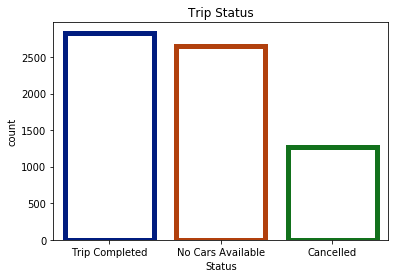

In [18]:
# plotting graph for trip status to show the different states-Trips requested, cancelled and completed
plt.title('Trip Status')
ax = sns.countplot(x="Status", data=df1,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3), 
                   order = df1['Status'].value_counts().index)

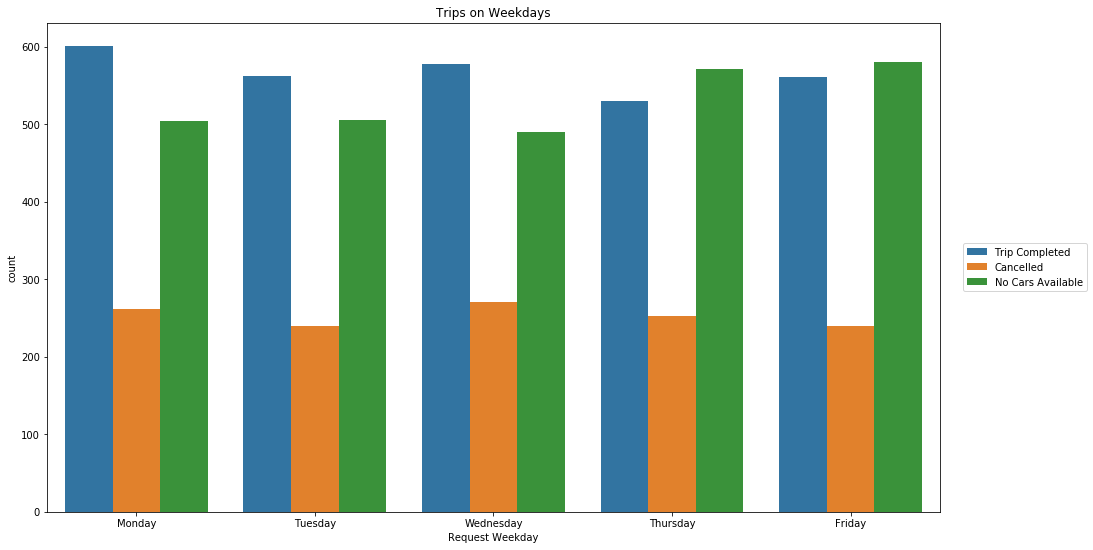

In [19]:
#Plotting the trip information on Weekdays
fig, ax = plt.subplots(figsize=(16,9))
plt.title("Trips on Weekdays")
ax1 = sns.countplot(x='Request Weekday',hue='Status',data=df1)
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')

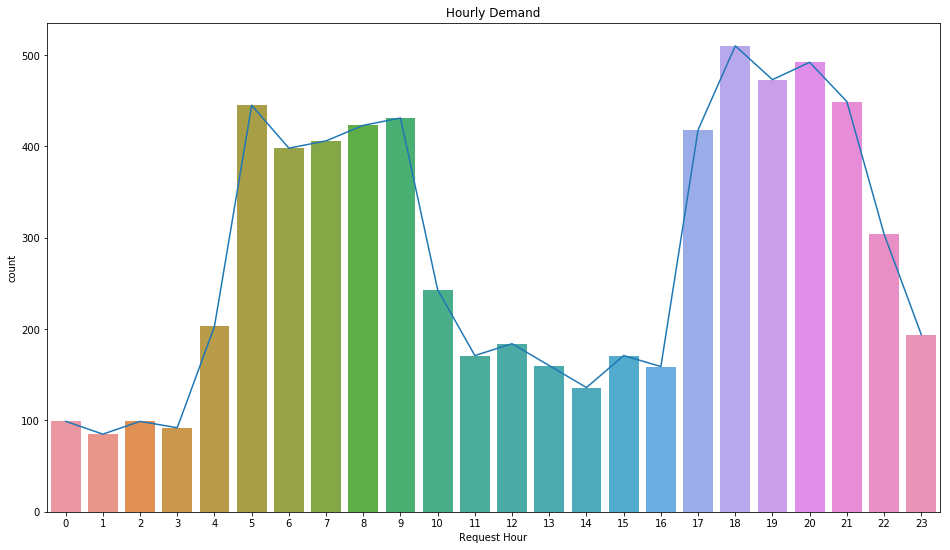

In [20]:
# plot data to show hourly distribution of request/demand
fig, ax = plt.subplots(figsize=(16,9))
plt.title('Hourly Demand')
df1.groupby(df1['Request Hour']).count()['Request id'].plot(ax=ax)
sns.countplot(df1['Request Hour'])

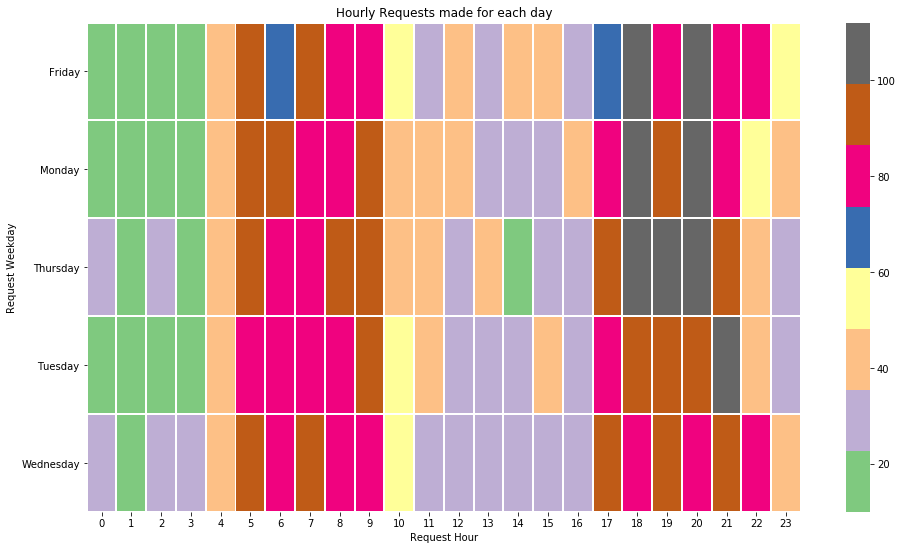

In [21]:
#Heatmap data for requests with weekdays and hours
heat_data_demand = df1.groupby(['Request Weekday', 'Request Hour']).size().reset_index()
heat_data_demand.columns = ['Request Weekday', 'Request Hour', 'Hourly Count']
# plot data to show hourly request heatmap
fig, ax = plt.subplots(figsize=(16,9))

plt.title('Hourly Requests made for each day')
sns.heatmap(heat_data_demand.pivot('Request Weekday', 'Request Hour', 'Hourly Count'), linewidths=1, cmap="Accent")
plt.yticks(rotation=0)
plt.show()

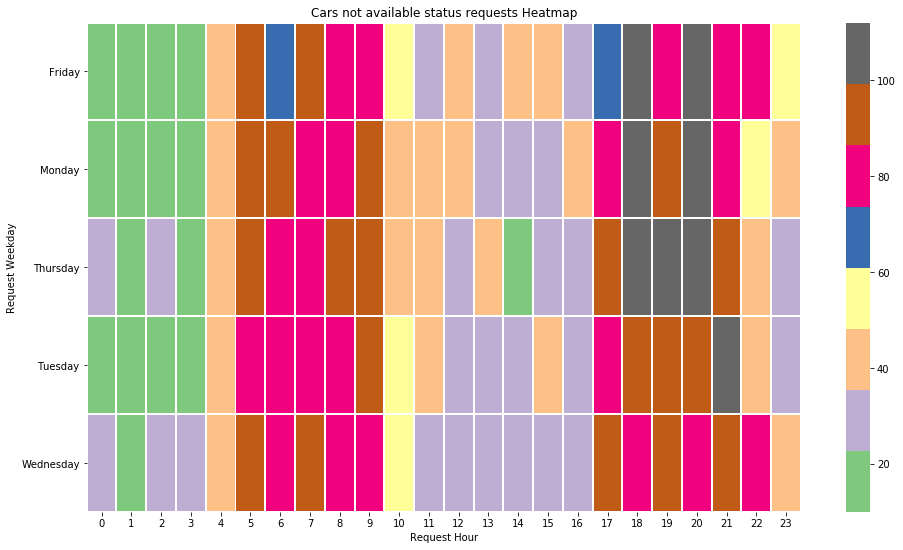

In [22]:
#Heatmap data for 'No cars Available' Status on weekdays and hours
cars_notavailable = df1[df1["Driver id"].isnull()]
cars_notavailable.head()
heat_data_no_cars = cars_notavailable.groupby(['Request Weekday', 'Request Hour']).size().reset_index()
heat_data_no_cars.columns = ['Request Weekday', 'Request Hour', 'Hourly Count']
# plot data to show hourly distribution of requests when cars were not available
fig, ax = plt.subplots(figsize=(16,9))

plt.title('Cars not available status requests Heatmap')
sns.heatmap(heat_data_demand.pivot('Request Weekday', 'Request Hour', 'Hourly Count'), linewidths=1, cmap="Accent")
plt.yticks(rotation=0)
plt.show()

C:\Users\arock\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


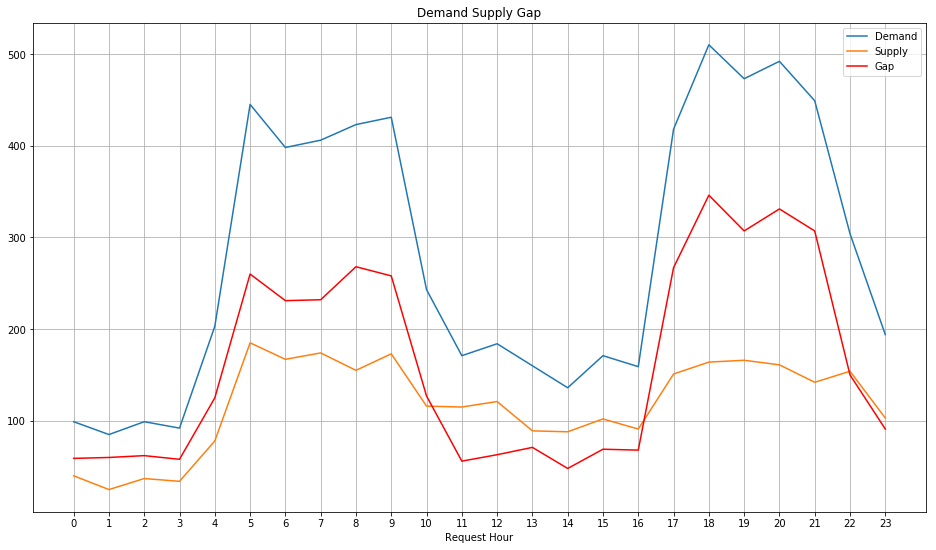

In [23]:
#Plotting the distribution of Demand(requests made), Supply(Requests Completed) and Gap (Requests rejected)
fig, ax = plt.subplots(figsize=(16,9))
plt.xticks([i for i in range(0,24)])
df1.groupby(df1['Request Hour']).count()['Request id'].plot(ax=ax, label='Demand')
df1[df1['Status']=="Trip Completed"].groupby(df1[df1['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(ax=ax, label='Supply')
(df1.groupby(df1['Request Hour']).count()['Request id'] - df1[df1['Status']=="Trip Completed"].groupby(df1[df1['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(ax=ax, label='Gap', c='red')
plt.grid("on")
plt.title("Demand Supply Gap")
plt.legend()

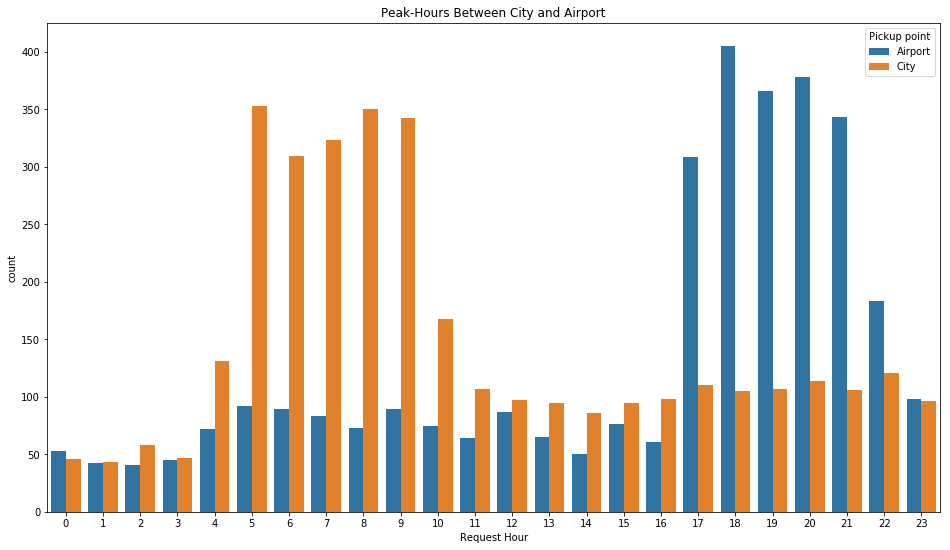

In [25]:
# plot hourly data to visualize peakhours from city to airport and airport to city trip
plt.subplots(figsize=(16,9))
plt.title("Peak-Hours Between City and Airport")
sns.countplot(x='Request Hour',hue='Pickup point',data=df1)

In [26]:
#creating two dataframes for City and Airport seperate analysis
city_pick = df1[df1['Pickup point']=="City"]
airport_pick = df1[df1['Pickup point']=="Airport"]

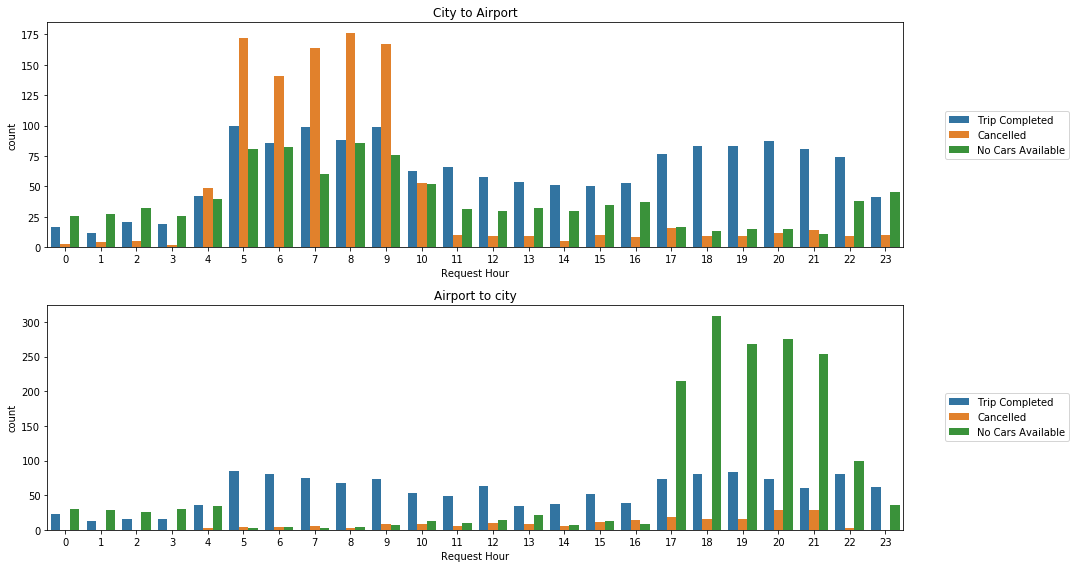

In [27]:
# plot data to get count of status for airport to city and city to airport trips
f = plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("City to Airport")
sns.countplot(x='Request Hour',hue='Status',data=city_pick)
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.subplot(2,1,2)
plt.title("Airport to city")
sns.countplot(x='Request Hour',hue='Status',data=airport_pick)
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.tight_layout()

C:\Users\arock\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


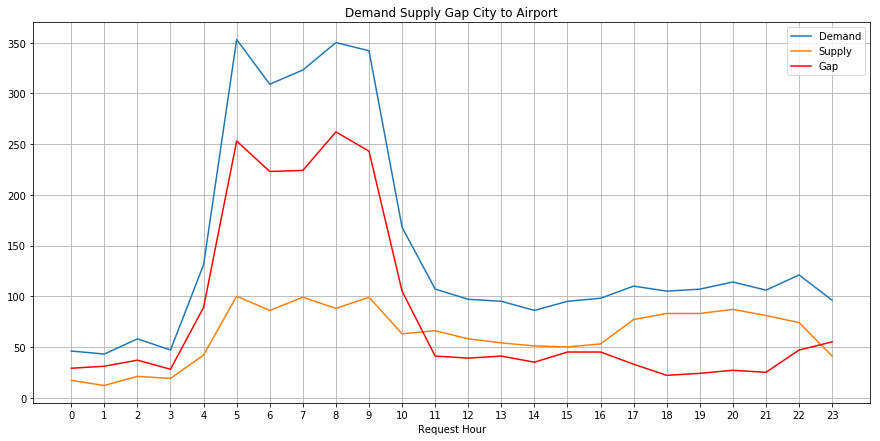

In [28]:
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
city_pick.groupby(city_pick['Request Hour']).count()['Request id'].plot(ax=ax, label='Demand')
city_pick[city_pick['Status']=="Trip Completed"].groupby(city_pick[city_pick['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(ax=ax, label='Supply')
(city_pick.groupby(city_pick['Request Hour']).count()['Request id'] - city_pick[city_pick['Status']=="Trip Completed"].groupby(city_pick[city_pick['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(ax=ax, label='Gap', c='red')
plt.grid("on")
plt.title("Demand Supply Gap City to Airport")
plt.legend()

C:\Users\arock\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


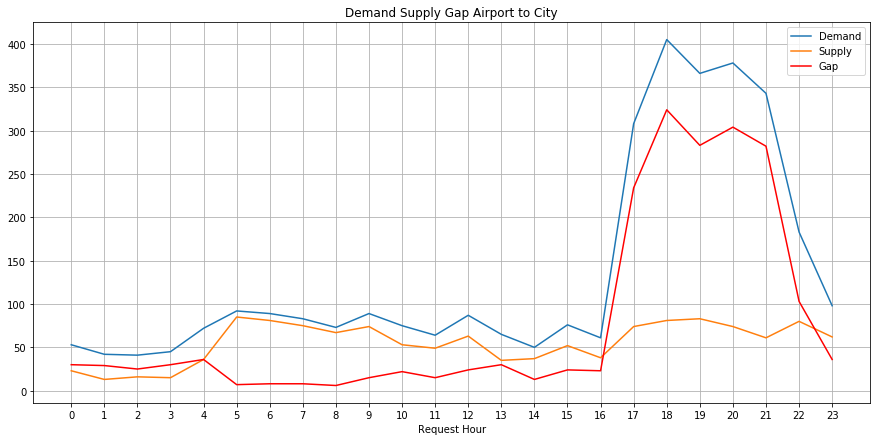

In [29]:
#plot data to show demand supply gap Airport to City
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
airport_pick.groupby(airport_pick['Request Hour']).count()['Request id'].plot(ax=ax, label='Demand')
airport_pick[airport_pick['Status']=="Trip Completed"].groupby(airport_pick[airport_pick['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(ax=ax, label='Supply')
(airport_pick.groupby(airport_pick['Request Hour']).count()['Request id'] - airport_pick[airport_pick['Status']=="Trip Completed"].groupby(airport_pick[airport_pick['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(ax=ax, label='Gap', c='red')
plt.grid("on")
plt.title("Demand Supply Gap Airport to City")
plt.legend()

In [30]:
# Early Morning - timeslot 00:00:00 to 3:59:59 city-airport & airport-city
early_morning_city = pd.DataFrame(city_pick[(city_pick['Request Hour']<4)]).reset_index()
early_morning_airport = pd.DataFrame(airport_pick[(airport_pick['Request Hour']<4)]).reset_index()
# Mid Morning - timeslot 04:00:00 to 7:59:59 city-airport & airport-city
mid_morning_city = pd.DataFrame(city_pick[(city_pick['Request Hour']>=4) & (city_pick['Request Hour']<8)]).reset_index()
mid_morning_airport = pd.DataFrame(airport_pick[(airport_pick['Request Hour']>=4) & (airport_pick['Request Hour']<8)]).reset_index()
# Late Morning - timeslot 08:00:00 to 11:59:59 city-airport & airport-city
late_morning_city = pd.DataFrame(city_pick[(city_pick['Request Hour']>=8) & (city_pick['Request Hour']<12)]).reset_index()
late_morning_airport = pd.DataFrame(airport_pick[(airport_pick['Request Hour']>=8) & (airport_pick['Request Hour']<12)]).reset_index()
# Afternoon - timeslot 12:00:00 to 15:59:59 city-airport & airport-city
afternoon_city = pd.DataFrame(city_pick[(city_pick['Request Hour']>=12) & (city_pick['Request Hour']<16)]).reset_index()
afternoon_airport = pd.DataFrame(airport_pick[(airport_pick['Request Hour']>=12) & (airport_pick['Request Hour']<16)]).reset_index()
# Evening - timeslot 16:00:00 to 19:59:59 city-airport & airport-city
evening_city = pd.DataFrame(city_pick[(city_pick['Request Hour']>=16) & (city_pick['Request Hour']<20)]).reset_index()
evening_airport = pd.DataFrame(airport_pick[(airport_pick['Request Hour']>=16) & (airport_pick['Request Hour']<20)]).reset_index()
# Night - timeslot 20:00:00 to 23:59:59 city-airport & airport-city
night_city = pd.DataFrame(city_pick[(city_pick['Request Hour']>=20)]).reset_index()
night_airport = pd.DataFrame(airport_pick[(airport_pick['Request Hour']>=20)]).reset_index()

In [31]:
def get_percentage(dataset):
  percent = dataset.groupby(['Status']).index.count()/len(dataset)*100
  return percent

Text(0.5, 1.0, 'Night Airport-City')

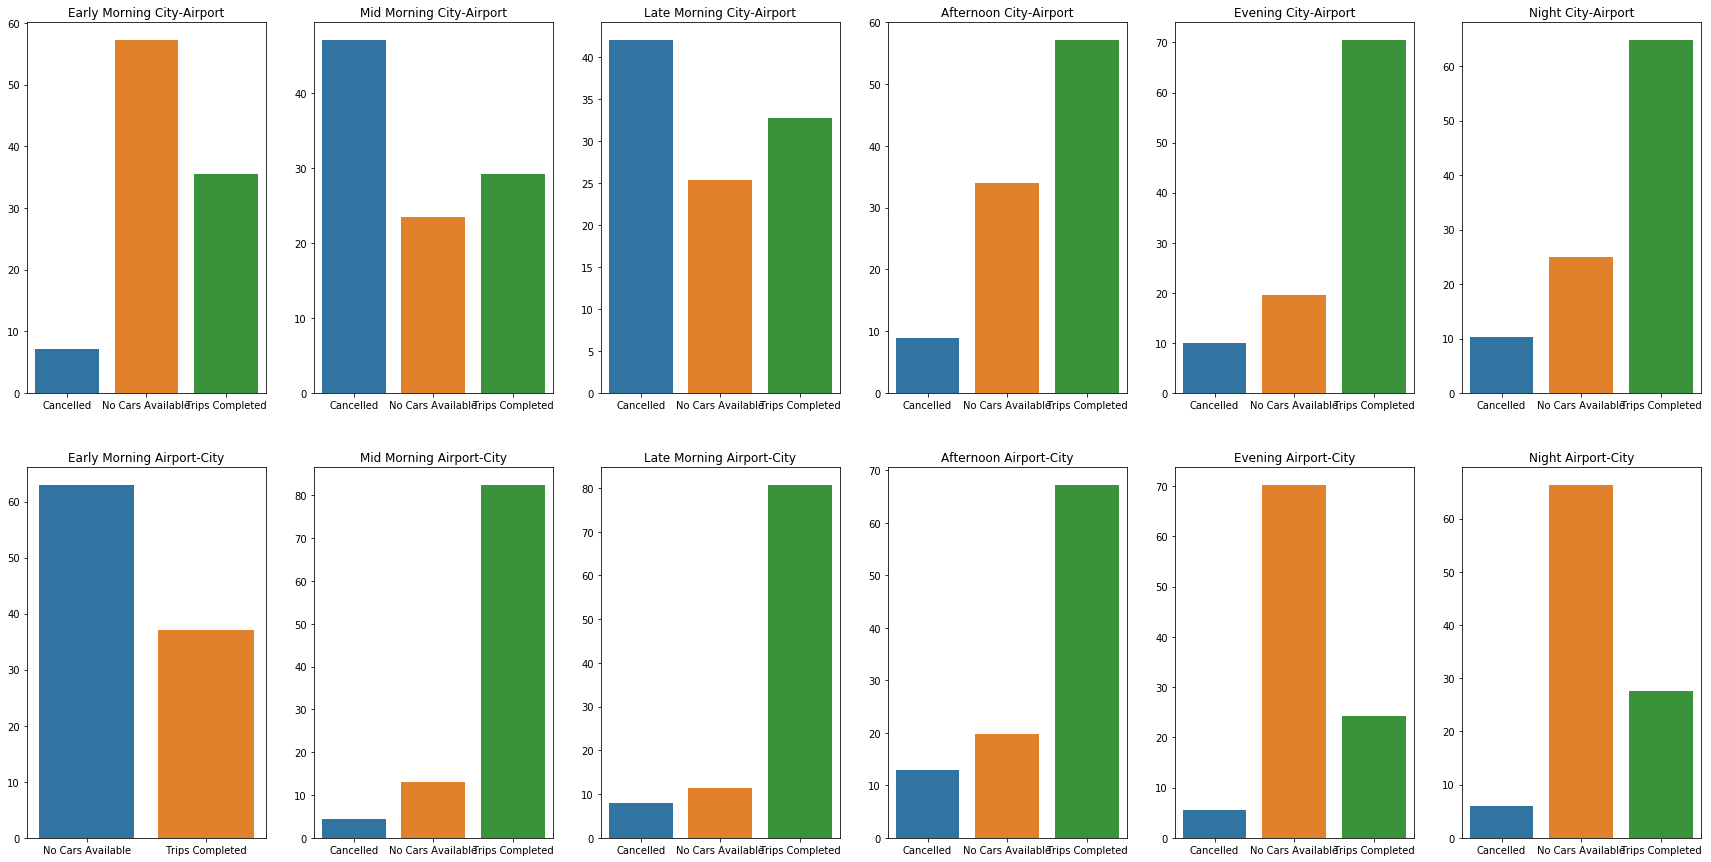

In [33]:
f, axes = plt.subplots(2, 6,figsize=(30, 15))
x = ["Cancelled","No Cars Available","Trips Completed"]
b = ["No Cars Available","Trips Completed"]
sns.barplot(x=x,y=np.array(get_percentage(early_morning_city)), ax = axes[0,0]).set_title('Early Morning City-Airport')
sns.barplot(x=x,y=np.array(get_percentage(mid_morning_city)), ax = axes[0,1]).set_title('Mid Morning City-Airport')
sns.barplot(x=x,y=np.array(get_percentage(late_morning_city)), ax = axes[0,2]).set_title('Late Morning City-Airport')
sns.barplot(x=x,y=np.array(get_percentage(afternoon_city)), ax = axes[0,3]).set_title('Afternoon City-Airport')
sns.barplot(x=x,y=np.array(get_percentage(evening_city)), ax = axes[0,4]).set_title('Evening City-Airport')
sns.barplot(x=x,y=np.array(get_percentage(night_city)), ax = axes[0,5]).set_title('Night City-Airport')
sns.barplot(x=b,y=np.array(get_percentage(early_morning_airport)), ax = axes[1,0]).set_title('Early Morning Airport-City')
sns.barplot(x=x,y=np.array(get_percentage(mid_morning_airport)), ax = axes[1,1]).set_title('Mid Morning Airport-City')
sns.barplot(x=x,y=np.array(get_percentage(late_morning_airport)), ax = axes[1,2]).set_title('Late Morning Airport-City')
sns.barplot(x=x,y=np.array(get_percentage(afternoon_airport)), ax = axes[1,3]).set_title('Afternoon Airport-City')
sns.barplot(x=x,y=np.array(get_percentage(evening_airport)), ax = axes[1,4]).set_title('Evening Airport-City')
sns.barplot(x=x,y=np.array(get_percentage(night_airport)), ax = axes[1,5]).set_title('Night Airport-City')